In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori, association_rules

In [2]:
# Criar o dataset com os dados fornecidos
data = pd.read_csv('data/encontros.csv')

In [3]:
# Criar o DataFrame
df = pd.DataFrame(data)

In [4]:
# Codificar variáveis categóricas para binário
df_encoded = pd.get_dummies(df.drop(columns=['encontro']))
df_encoded['encontro_sim'] = (df['encontro'] == 'sim').astype(int)

In [5]:
# Gerar conjuntos frequentes com suporte mínimo de 0.1
frequent_itemsets = apriori(df_encoded, min_support=0.1, use_colnames=True)

c:\Users\Avelino\AppData\Local\Programs\Python\Python313\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [6]:
# Gerar regras de associação com confiança mínima de 0.6
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.6)

In [7]:
# Filtrar regras que preveem "encontro_sim=1" (sim)
rules = rules[rules['consequents'] == {'encontro_sim'}]

In [8]:
# Ordenar as regras por lift e confidence
rules = rules.sort_values(['lift', 'confidence'], ascending=False)

In [9]:
# Mostrar as regras
print("\nRegras de Associação que preveem 'encontro_sim=1':")
print(rules[['antecedents', 'support', 'confidence', 'lift']])


Regras de Associação que preveem 'encontro_sim=1':
                                          antecedents   support  confidence  \
4          (tipo_dia_fim_semana, tipo_encontro_disco)  0.235294    1.000000   
39  (tipo_dia_fim_semana, tipo_encontro_disco, met...  0.117647    1.000000   
43  (tipo_dia_fim_semana, tipo_encontro_disco, met...  0.117647    1.000000   
46  (tipo_dia_fim_semana, tipo_encontro_disco, tv_...  0.117647    1.000000   
49  (tipo_dia_fim_semana, tipo_encontro_disco, tv_...  0.117647    1.000000   
52        (tipo_dia_fim_semana, tv_mau, meteo_quente)  0.117647    1.000000   
60  (tipo_encontro_jantar, tipo_dia_semana, meteo_...  0.176471    1.000000   
82       (tipo_encontro_jantar, tv_mau, meteo_quente)  0.117647    1.000000   
87  (tv_bom, tipo_encontro_jantar, tipo_dia_semana...  0.117647    1.000000   
32               (tipo_encontro_jantar, meteo_quente)  0.235294    0.800000   
8                 (tipo_dia_fim_semana, meteo_quente)  0.176471    0.750000   


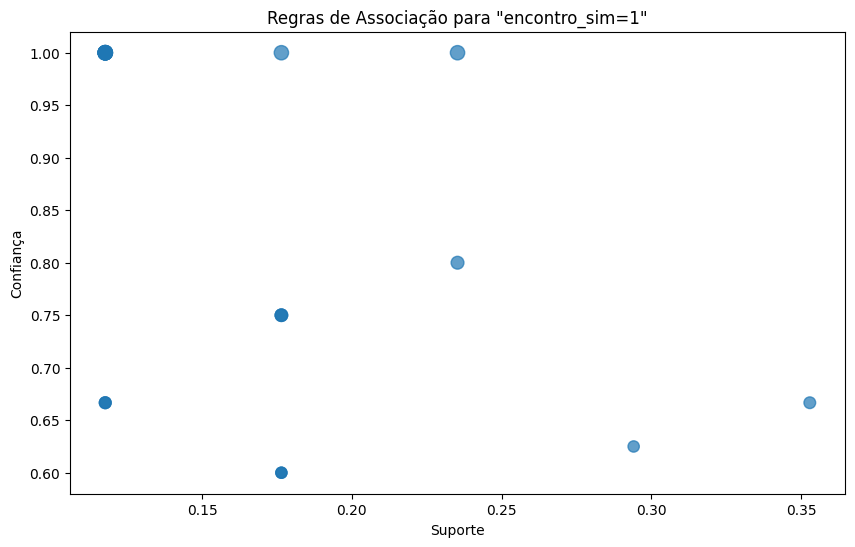

In [10]:
# Visualizar as regras (opcional)
plt.figure(figsize=(10,6))
plt.scatter(rules['support'], rules['confidence'], alpha=0.7, s=rules['lift']*50, marker='o')
plt.title('Regras de Associação para "encontro_sim=1"')
plt.xlabel('Suporte')
plt.ylabel('Confiança')
plt.show()